In [1]:
import numpy as np
import pandas as pd
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
from scipy.stats import linregress
import string

In [2]:
aa_df = pd.read_excel('/home/robbie/Dropbox/book_chapter/data/Sea_Ice_Index_Daily_Extent_G02135_v3.0_new.xlsx',
                      sheet_name='SH-Daily-Extent')

aa_df.drop(columns=['Unnamed: 0',
                 'Unnamed: 1',
                 ' ',
                 '1981-2010 mean',
                 '1981-2010 median'],
        inplace=True)

aa_df[aa_df.isnull()] = np.nan

aa_df

,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,NaN,NaN,5.967,6.323,NaN,6.508,NaN,NaN,7.718,NaN,...,7.121,8.546,9.393,6.911,5.516,6.384,5.314,6.285,6.459,5.493
1,NaN,6.945,NaN,NaN,7.039,NaN,6.944,6.527,NaN,6.765,...,6.935,8.410,9.273,6.721,5.387,6.244,5.136,6.129,6.337,5.276
2,NaN,NaN,5.674,5.791,NaN,6.170,NaN,NaN,7.572,NaN,...,6.841,8.243,9.154,6.554,5.232,6.114,4.968,5.967,6.224,5.160
3,NaN,6.838,NaN,NaN,6.689,NaN,6.653,6.061,NaN,6.458,...,6.756,8.114,8.983,6.413,5.149,5.921,4.876,5.876,6.063,4.988
4,NaN,NaN,5.584,5.351,NaN,5.869,NaN,NaN,7.243,NaN,...,6.601,7.880,8.821,6.250,5.065,5.768,4.750,5.774,5.900,4.819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,7.907,NaN,NaN,8.005,NaN,7.888,8.052,NaN,7.731,NaN,...,9.529,9.943,8.358,6.156,7.146,5.989,7.011,7.441,6.461,NaN
362,NaN,6.396,7.178,NaN,6.912,NaN,NaN,8.628,NaN,NaN,...,9.317,9.832,8.098,6.038,6.998,5.833,6.878,7.208,6.295,NaN
363,7.588,NaN,NaN,7.716,NaN,7.588,7.707,NaN,7.284,NaN,...,9.096,9.701,7.791,5.873,6.829,5.704,6.735,7.121,6.185,NaN
364,NaN,6.124,6.634,NaN,6.708,NaN,NaN,8.132,NaN,NaN,...,8.849,9.605,7.494,5.787,6.684,5.599,6.624,6.984,5.846,NaN


In [6]:
ao_df = pd.read_excel('/home/robbie/Dropbox/book_chapter/data/Sea_Ice_Index_Daily_Extent_G02135_v3.0_new.xlsx',sheet_name='NH-Daily-Extent')

# ao_df.drop(index=59,inplace=True)
ao_df.drop(columns=['Unnamed: 0',
                 'Unnamed: 1',
                 ' ',
                 '1981-2010 mean',
                 '1981-2010 median'],
        inplace=True)

ao_df[ao_df.isnull()] = np.nan

ao_df

,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,NaN,NaN,14.200,14.256,NaN,14.253,NaN,NaN,14.036,NaN,...,12.959,13.011,13.073,12.721,12.643,12.484,12.934,13.046,12.702,13.302
1,NaN,14.997,NaN,NaN,14.479,NaN,14.103,14.045,NaN,14.305,...,12.961,13.103,13.125,12.806,12.644,12.600,12.992,13.072,12.671,13.438
2,NaN,NaN,14.302,14.456,NaN,14.306,NaN,NaN,14.292,NaN,...,13.012,13.116,13.112,12.790,12.713,12.634,12.980,13.170,12.704,13.411
3,NaN,14.922,NaN,NaN,14.642,NaN,14.237,14.240,NaN,14.417,...,13.045,13.219,13.051,12.829,12.954,12.724,13.045,13.193,12.770,13.436
4,NaN,NaN,14.414,14.435,NaN,14.494,NaN,NaN,14.489,NaN,...,13.065,13.148,13.115,12.874,12.956,12.834,13.147,13.166,12.814,13.477
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,14.383,NaN,NaN,13.953,NaN,13.664,13.394,NaN,13.766,NaN,...,12.693,12.967,12.680,12.291,12.291,12.325,12.721,12.579,12.947,NaN
362,NaN,14.101,14.172,NaN,14.144,NaN,NaN,13.571,NaN,NaN,...,12.870,12.930,12.745,12.484,12.235,12.344,12.712,12.582,12.978,NaN
363,14.500,NaN,NaN,14.128,NaN,13.855,13.494,NaN,13.904,NaN,...,12.897,12.936,12.762,12.525,12.223,12.523,12.780,12.608,13.050,NaN
364,NaN,14.092,14.093,NaN,14.159,NaN,NaN,13.701,NaN,NaN,...,12.804,13.038,12.800,12.617,12.273,12.569,12.858,12.622,13.149,NaN


In [7]:
aa_timeseries = []
ao_timeseries = []
tot_ts = []

for col in aa_df.columns[:]:
    
    aa_timeseries += list(aa_df[col])
    ao_timeseries += list(ao_df[col])
    
    tot_ts += list( np.array(aa_df[col]) + np.array(ao_df[col])    )
    
aa_timeseries = np.array(aa_timeseries)
aa_timeseries[np.isnan(aa_timeseries)] = np.nan
aa_x = np.arange(len(aa_timeseries))[~np.isnan(aa_timeseries)]
aa_y = aa_timeseries[~np.isnan(aa_timeseries)]

ao_timeseries = np.array(ao_timeseries)
ao_timeseries[np.isnan(ao_timeseries)] = np.nan
ao_x = np.arange(len(ao_timeseries))[~np.isnan(ao_timeseries)]
ao_y = ao_timeseries[~np.isnan(ao_timeseries)]

tot_ts = np.array(tot_ts)
tot_ts[np.isnan(tot_ts)] = np.nan
tot_x = np.arange(len(tot_ts))[~np.isnan(tot_ts)]
tot_y = tot_ts[~np.isnan(tot_ts)]

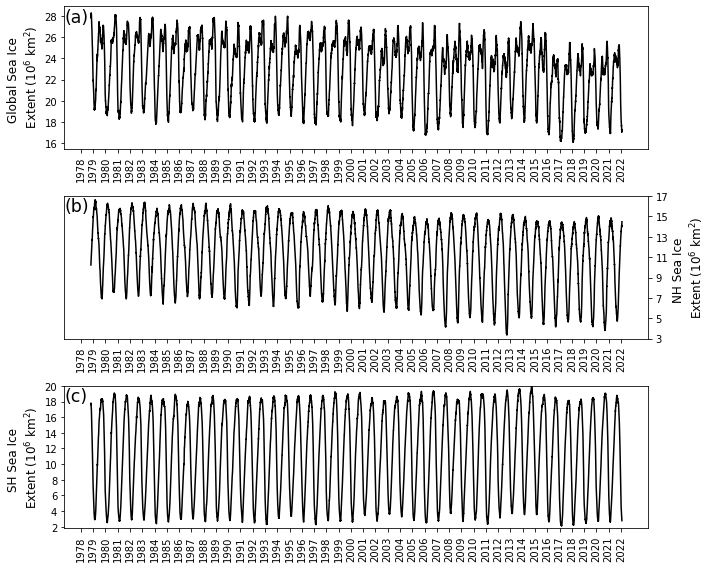

In [9]:
fig, (ax0,ax1,ax2) = plt.subplots(3,1,figsize=(10,8))

for ax, letter in zip([ax0,ax1,ax2],string.ascii_letters):
    ax.annotate(f'({letter})',fontsize='xx-large',xy=(0.0,0.99),va='top',xycoords='axes fraction',
                 zorder=10)

line_color = 'k'

ax0.plot(tot_x,tot_y,color=line_color)

ax0.set_xticks(np.arange(0,366*45,366))
ax0.set_xticklabels(np.arange(1978,2023),rotation=90)

ax0.set_ylabel('Global Sea Ice \n Extent (10$^6$ km$^2$)', fontsize='large')

ax1.plot(ao_x,ao_y,color=line_color)

ax1.set_xticks(np.arange(0,366*45,366))
ax1.set_xticklabels(np.arange(1978,2023),rotation=90)

ax1.set_ylabel('NH Sea Ice \nExtent (10$^6$ km$^2$)', fontsize='large')

ax1.yaxis.tick_right()
ax1.yaxis.set_label_position('right')

ax1.set_ylim(3,17)
ax1.set_yticks(np.arange(3,18,2))


ax2.plot(aa_x,aa_y,color=line_color)

ax2.set_xticks(np.arange(0,366*45,366))
ax2.set_xticklabels(np.arange(1978,2023),rotation=90)

ax2.set_ylim(1.8,20)
ax2.set_yticks(np.arange(2,21,2))

ax2.set_ylabel('SH Sea Ice \nExtent (10$^6$ km$^2$)', fontsize='large')

plt.subplots_adjust(hspace=0)

plt.tight_layout()

fig_num = 2

for data_dir in['/home/robbie/Dropbox/book_chapter/figs',
                 '/home/robbie/Dropbox/Apps/Overleaf/Book_chapter/figs']:
    
    plt.savefig(f'{data_dir}/fig{fig_num}.jpg',dpi=500, bbox_inches='tight')

plt.show()

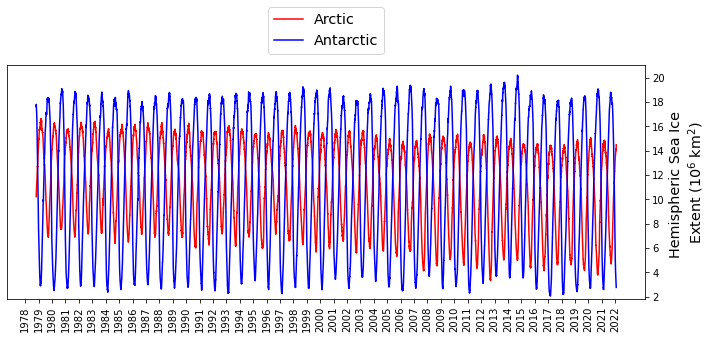

In [24]:
fig, ax1 = plt.subplots(1,1,figsize=(10,4))

ax1.plot(ao_x,ao_y,color='r',label='Arctic')

ax1.set_xticks(np.arange(0,366*45,366))
ax1.set_xticklabels(np.arange(1978,2023),rotation=90)

ax1.set_ylabel('Hemispheric Sea Ice \nExtent (10$^6$ km$^2$)', fontsize='x-large')

ax1.yaxis.tick_right()
ax1.yaxis.set_label_position('right')

ax1.plot(aa_x,aa_y,color='b',label='Antarctic')

ax1.set_ylim(1.8,21)
ax1.set_yticks(np.arange(2,21,2))

plt.subplots_adjust(hspace=0)

plt.tight_layout()

plt.legend(bbox_to_anchor=(0.5,1.15),loc='center',fontsize='x-large')

plt.show()

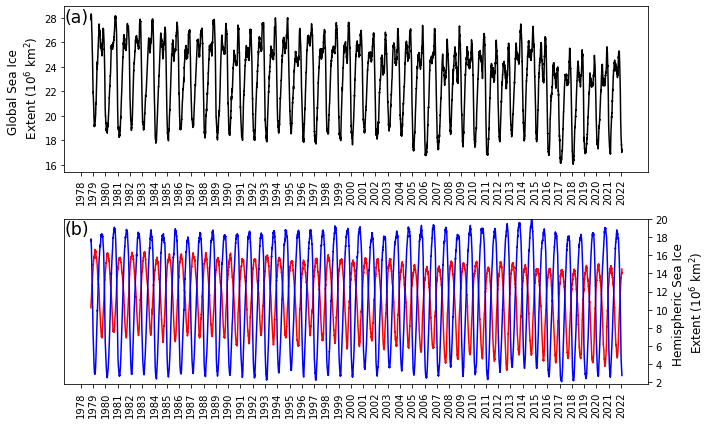

In [13]:
fig, (ax0,ax1) = plt.subplots(2,1,figsize=(10,6))

for ax, letter in zip([ax0,ax1,ax2],string.ascii_letters):
    
    ax.annotate(f'({letter})',fontsize='xx-large',xy=(0.0,0.99),va='top',xycoords='axes fraction',
                 zorder=10)

line_color = 'k'

ax0.plot(tot_x,tot_y,color=line_color)

ax0.set_xticks(np.arange(0,366*45,366))
ax0.set_xticklabels(np.arange(1978,2023),rotation=90)

ax0.set_ylabel('Global Sea Ice \n Extent (10$^6$ km$^2$)', fontsize='large')

ax1.plot(ao_x,ao_y,color='r')

ax1.set_xticks(np.arange(0,366*45,366))
ax1.set_xticklabels(np.arange(1978,2023),rotation=90)

ax1.set_ylabel('Hemispheric Sea Ice \nExtent (10$^6$ km$^2$)', fontsize='large')

ax1.yaxis.tick_right()
ax1.yaxis.set_label_position('right')

ax1.plot(aa_x,aa_y,color='b')

ax1.set_ylim(1.8,20)
ax1.set_yticks(np.arange(2,21,2))

plt.subplots_adjust(hspace=0)

plt.tight_layout()

fig_num = 2

plt.show()